In [1]:
from nltk.classify import PositiveNaiveBayesClassifier
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lxml import objectify
from pandas import DataFrame
from datetime import datetime, date, time
from dateutil.parser import parse
import pandas as pd
import numpy as np
import sklearn as sk
import time
import sys
from sklearn import metrics
import re
import nltk.stem

ru_stemmer = nltk.stem.SnowballStemmer('russian')
from numpy.lib.scimath import logn
from math import e
from sklearn import preprocessing
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)


In [7]:
data_start=pd.read_pickle('data/WikiData_dat_5.pkl')
#print (data_start.head(1))
topic=[]
for row in data_start['cat'].tolist():
    if "спорт" in row:
        topic.append("sport")
    else:
        topic.append("other")
print (len(topic))
data_start['topic']=topic
data_bi=data_start[['title', 'cat', 'text2', 'noun', 'topic']][:3000]
data_test=data_start[['title', 'cat', 'text2', 'noun', 'topic']][3000:4000]
d_sport = (data_bi['topic']==u'sport')
d_other=(data_bi['topic']==u'other')
#data2=pd.concat([data_bi.loc[d_sport], data_bi.loc[d_other]])
data=data_bi.loc[d_sport]
data_o=data_bi.loc[d_other]
data_other=data_o[:100]
print (len(data), len(data_test), len(data_other))
print ('Test \n', data_test['topic'].value_counts(), '\nALL \n',  data_start['topic'].value_counts(), '\nLearning\n', data['topic'].value_counts())

sentence = data['title'].tolist()

10748
117 1000 100
Test 
 other    969
sport     31
Name: topic, dtype: int64 
ALL 
 other    10549
sport      199
Name: topic, dtype: int64 
Learning
 sport    117
Name: topic, dtype: int64


In [8]:
def features(sentence):
    words = sentence.lower().split()
    return dict(('contains(%s)' % w, True) for w in words)

In [9]:
sports_sentences = data['title'].tolist()
various_sentences = data_other['title'].tolist()
positive_featuresets = list(map(features, sports_sentences))
unlabeled_featuresets = list(map(features, various_sentences))
classifier = PositiveNaiveBayesClassifier.train(positive_featuresets, unlabeled_featuresets)


In [10]:
%%time

i = 0
outputpredict = []
#outputpredictVal=[]
executionTime=[]
for query in data_test['title']:
    start_time = time.time()
    out=classifier.classify(features(query))
    #print (out)
    if out:
        outputpredict.append('sport')
    else:
        outputpredict.append('other')
    end_time = time.time()
    execution_time = round(end_time - start_time, 5)
    #outputpredict.append(out[0])
    #outputpredictVal.append(out[1])
    i+=1
    executionTime.append(execution_time)
    if i%500==0:
        print (i, query, out, execution_time)

    

500 google обогнала microsoft и заняла второе место среди it-компаний по капитализации True 0.0
1000 санта-клаус прибыл в голливуд (видео) True 0.0
Wall time: 30 ms


accuracy:   0.252
[[227 742]
 [  6  25]]


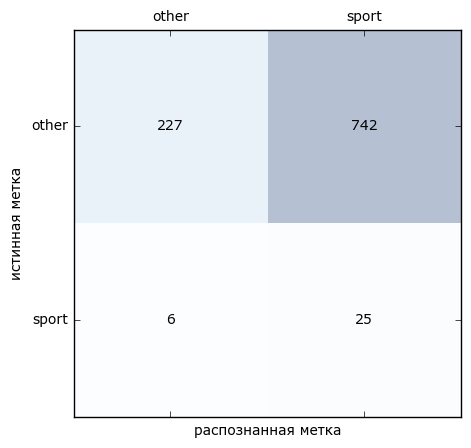

In [12]:
score = metrics.accuracy_score(data_test.topic.tolist(), outputpredict)
print("accuracy:   %0.3f" % score)

confmat=confusion_matrix(data_test.topic.tolist(), outputpredict)
print (confmat)

labels=['other', 'sport']
confmat=metrics.confusion_matrix(data_test.topic.tolist(), outputpredict, labels=labels)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    #print (labels[i])
    for j in range(confmat.shape[1]):
        #print (labels[j])
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xticks(np.arange(0,2), labels)
plt.yticks(np.arange(0,2), labels)
plt.xlabel('распознанная метка')
plt.ylabel('истинная метка')
plt.savefig('data/PNB.png')
plt.show()